<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_stratified_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.analyseup.com/python-machine-learning/stratified-kfold.html

- https://www.youtube.com/watch?v=ZnSJgIULMVY ---> K-Fold, Stratified, Leave One Out, Repeated K-Fold Cross Validation

-------------------

- target here is the Returned_Units column which will be either 1 or 0.

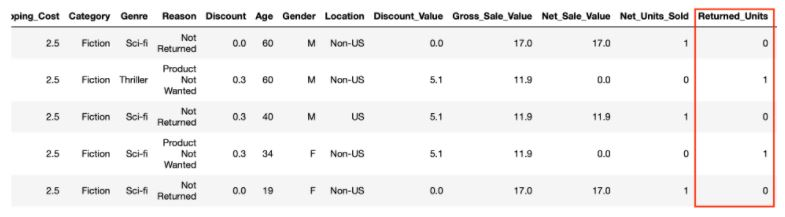

- Let’s have a quick check to see what the class ratio looks like for this column.

In [ ]:
print('Class Ratio:', sum(df['Returned_Units'])/len(df['Returned_Units']))

> Class Ratio: 0.216

- As you can see in our data, **21.6%** of the time a **product is returned**. When we create our folds we want **each split to have this same percentage of returns.**

-----------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import numpy as np
import pandas as pd

import time
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, LeaveOneOut,RepeatedKFold, train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Telco-Customer-Churn.zip")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Churn_label'] = pd.factorize(df['Churn'])[0]

In [ ]:
df.drop(['customerID', 'Churn'], axis=1, inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_label
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
X = df.drop('Churn_label', axis=1)
y = df['Churn_label']

In [ ]:
num_cols = X.select_dtypes(include=np.number).columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [ ]:
cat_cols = X.select_dtypes(exclude=np.number).columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [ ]:
ct = ColumnTransformer([
    ('rob', RobustScaler(), num_cols),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [ ]:
pipe = Pipeline([
    ('ct_step', ct),
    ('model', RandomForestClassifier(n_estimators=10, random_state=0))
])

### **Stratified KFold**

#### **Method 1**

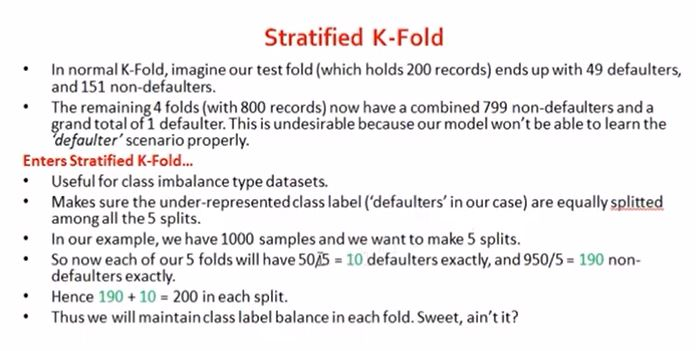

In [ ]:
df['Churn_label'].value_counts()

0    5174
1    1869
Name: Churn_label, dtype: int64

In [ ]:
1869/5

373.8

In [ ]:
5174/5

1034.8

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
scores_skf = []
i = 1
for train_set, test_set in skf.split(X, y):
    pipe.fit(X.loc[train_set], y[train_set])
    sco = pipe.score(X.loc[test_set], y[test_set])
    scores_skf.append(sco)
    print("iteration ", i)
    i += 1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [ ]:
scores_skf

[0.7828246983676366,
 0.7792760823278921,
 0.765791341376863,
 0.7776988636363636,
 0.7805397727272727]

In [ ]:
i = 1
for train_set, test_set in skf.split(X=X, y=y):
    print("iteration ", i)
    print(train_set, " having :" , len(train_set))
    print(test_set, " having :" , len(test_set))
    print()
    print("y train counts: \n", y[train_set].value_counts())
    print("y test counts: \n", y[test_set].value_counts())
    print("-------------------------")
    i += 1

iteration  1
[1408 1409 1411 ... 7040 7041 7042]  having : 5634
[   0    1    2 ... 1406 1407 1410]  having : 1409

y train counts: 
 0    4139
1    1495
Name: Churn_label, dtype: int64
y test counts: 
 0    1035
1     374
Name: Churn_label, dtype: int64
-------------------------
iteration  2
[   0    1    2 ... 7040 7041 7042]  having : 5634
[1408 1409 1411 ... 2862 2869 2871]  having : 1409

y train counts: 
 0    4139
1    1495
Name: Churn_label, dtype: int64
y test counts: 
 0    1035
1     374
Name: Churn_label, dtype: int64
-------------------------
iteration  3
[   0    1    2 ... 7040 7041 7042]  having : 5634
[2805 2806 2807 ... 4266 4269 4272]  having : 1409

y train counts: 
 0    4139
1    1495
Name: Churn_label, dtype: int64
y test counts: 
 0    1035
1     374
Name: Churn_label, dtype: int64
-------------------------
iteration  4
[   0    1    2 ... 7040 7041 7042]  having : 5635
[4207 4208 4209 ... 5643 5644 5646]  having : 1408

y train counts: 
 0    4139
1    1496
Nam

In [ ]:
result_kf = cross_val_score(estimator=pipe, X=X, y=y, scoring='accuracy', cv=5 )

In [ ]:
result_kf

array([0.7828247 , 0.77927608, 0.76579134, 0.77769886, 0.78053977])

In [ ]:
start = time.time()
result_kf10 = cross_val_score(estimator=pipe, X=X, y=y, scoring='accuracy', cv=KFold(n_splits=10))
result_kf10
print("time taken: ", time.time()-start)

time taken:  18.33046531677246


In [ ]:
result_kf10

array([0.78014184, 0.78865248, 0.78156028, 0.78409091, 0.76988636,
       0.75568182, 0.78125   , 0.765625  , 0.77130682, 0.77840909])

### **Possible inputs for cv are:**

- **None:** to use the **default 5-fold cross validation**

- **integer:** to specify the **number of folds in a (Stratified)KFold**

- For **integer/None** inputs, if the **estimator is a classifier** and **y is
either binary or multiclass**, **StratifiedKFold** is used. **In all
other cases, KFold is used.**

#### **Method 2**

In [31]:
from sklearn.model_selection import StratifiedKFold

accuracy = []

skf = StratifiedKFold(n_splits=10, random_state=100)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
  print("Train:", train_index, "Validation:", test_index)
  x1_train, x1_test = X.loc[train_index], X.loc[test_index]
  y1_train, y1_test = y.loc[train_index], y.loc[test_index]

  pipe.fit(x1_train, y1_train)
  prediction = pipe.predict(x1_test)
  score = accuracy_score(prediction, y1_test)
  accuracy.append(score)

print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train: [ 692  694  695 ... 7040 7041 7042] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 